 # Zeo2D
 ---
 Utilities for plotting zeolite illustrations.

In [1]:
from zeo2d import readcif, view, cleave, plot_stick_and_ball, plot_zeolite
import matplotlib.pyplot as plt

 ## Easy plot
 Plot ball and stick.

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a072b10>)

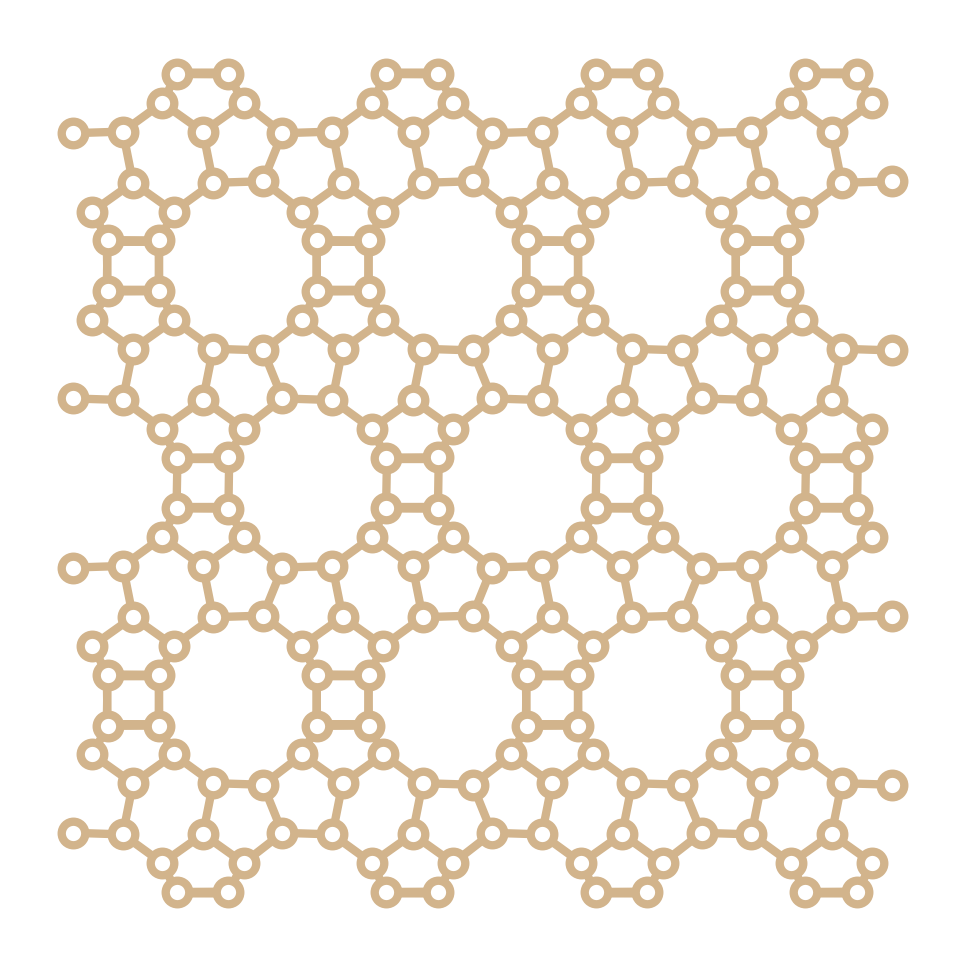

In [2]:
plot_zeolite("iza-structure.org/BEA.cif", surface=(1, 0, 0), supercell=(4, 2, 1))

 Or plot just stick.

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x81bd23f90>)

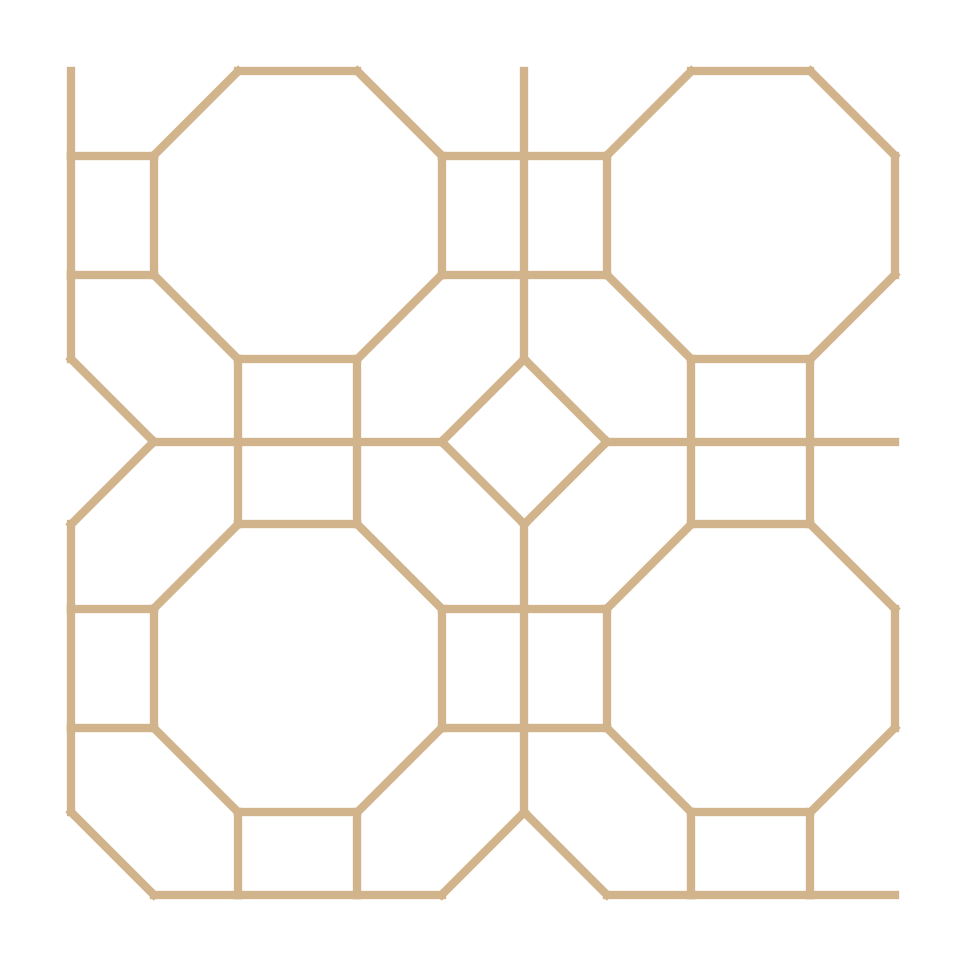

In [3]:
plot_zeolite("iza-structure.org/LTA.cif", surface=(0, 0, 1),
    Si_style={'s': 0, 'lw': 0})

 ## Plot with O atoms

(<Figure size 1800x1200 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x109544190>)

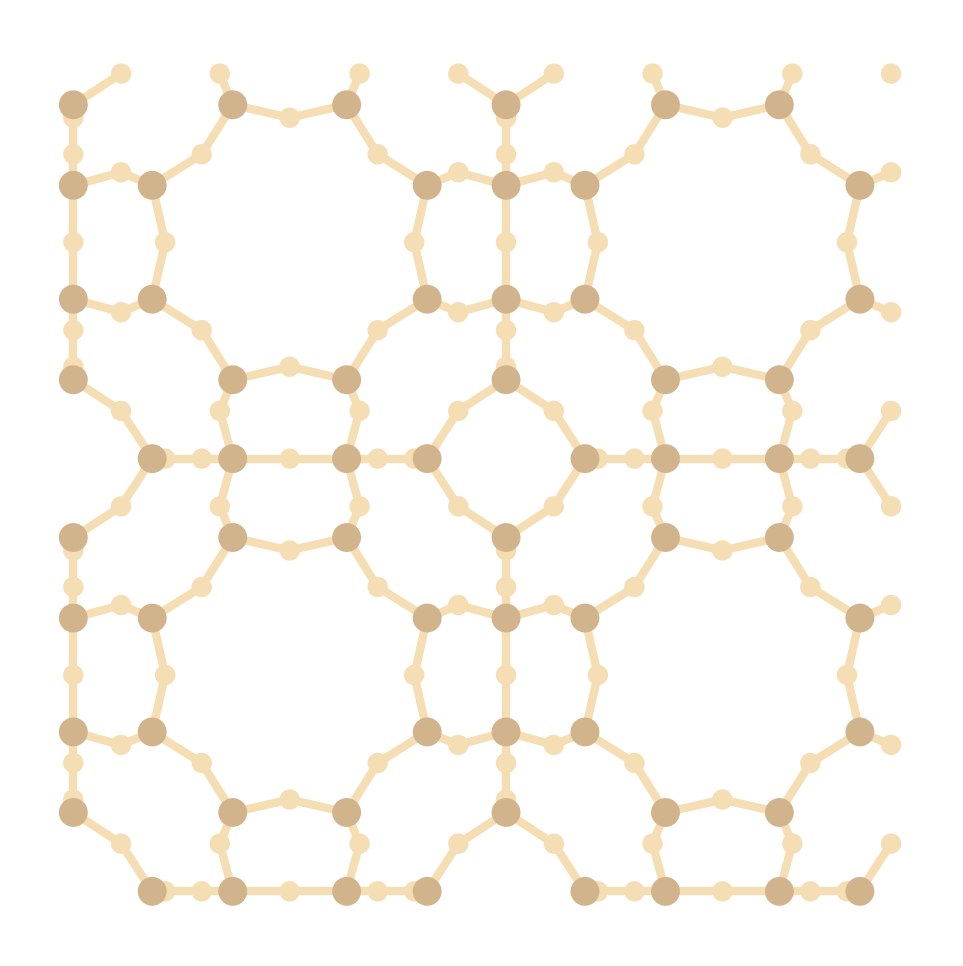

In [4]:
plot_zeolite("iza-structure.org/LTA.cif", (0, 0, 1), plot_O=True,
    O_style={'s': 24, 'lw': 0, 'c': 'wheat', 'edgecolors': ''},
    Si_style={'s': 48, 'lw': 0, 'c': 'tan', 'edgecolors': ''},
    bond_style={'color': 'wheat', 'lw': 2, 'zorder': -1})

 ## Plot with some modifications
 Here demonstrates how to create an array of atoms postions for plotting.

In [5]:
cell = readcif("iza-structure.org/LTL.cif")
surf = cleave(cell, (0, 0, 1), 1) * (2, 2, 1)
surf.rotate(120, 'z', center='COU')
# Preview of 3D structure, may not rendering properly.
view(surf, viewer='x3d')

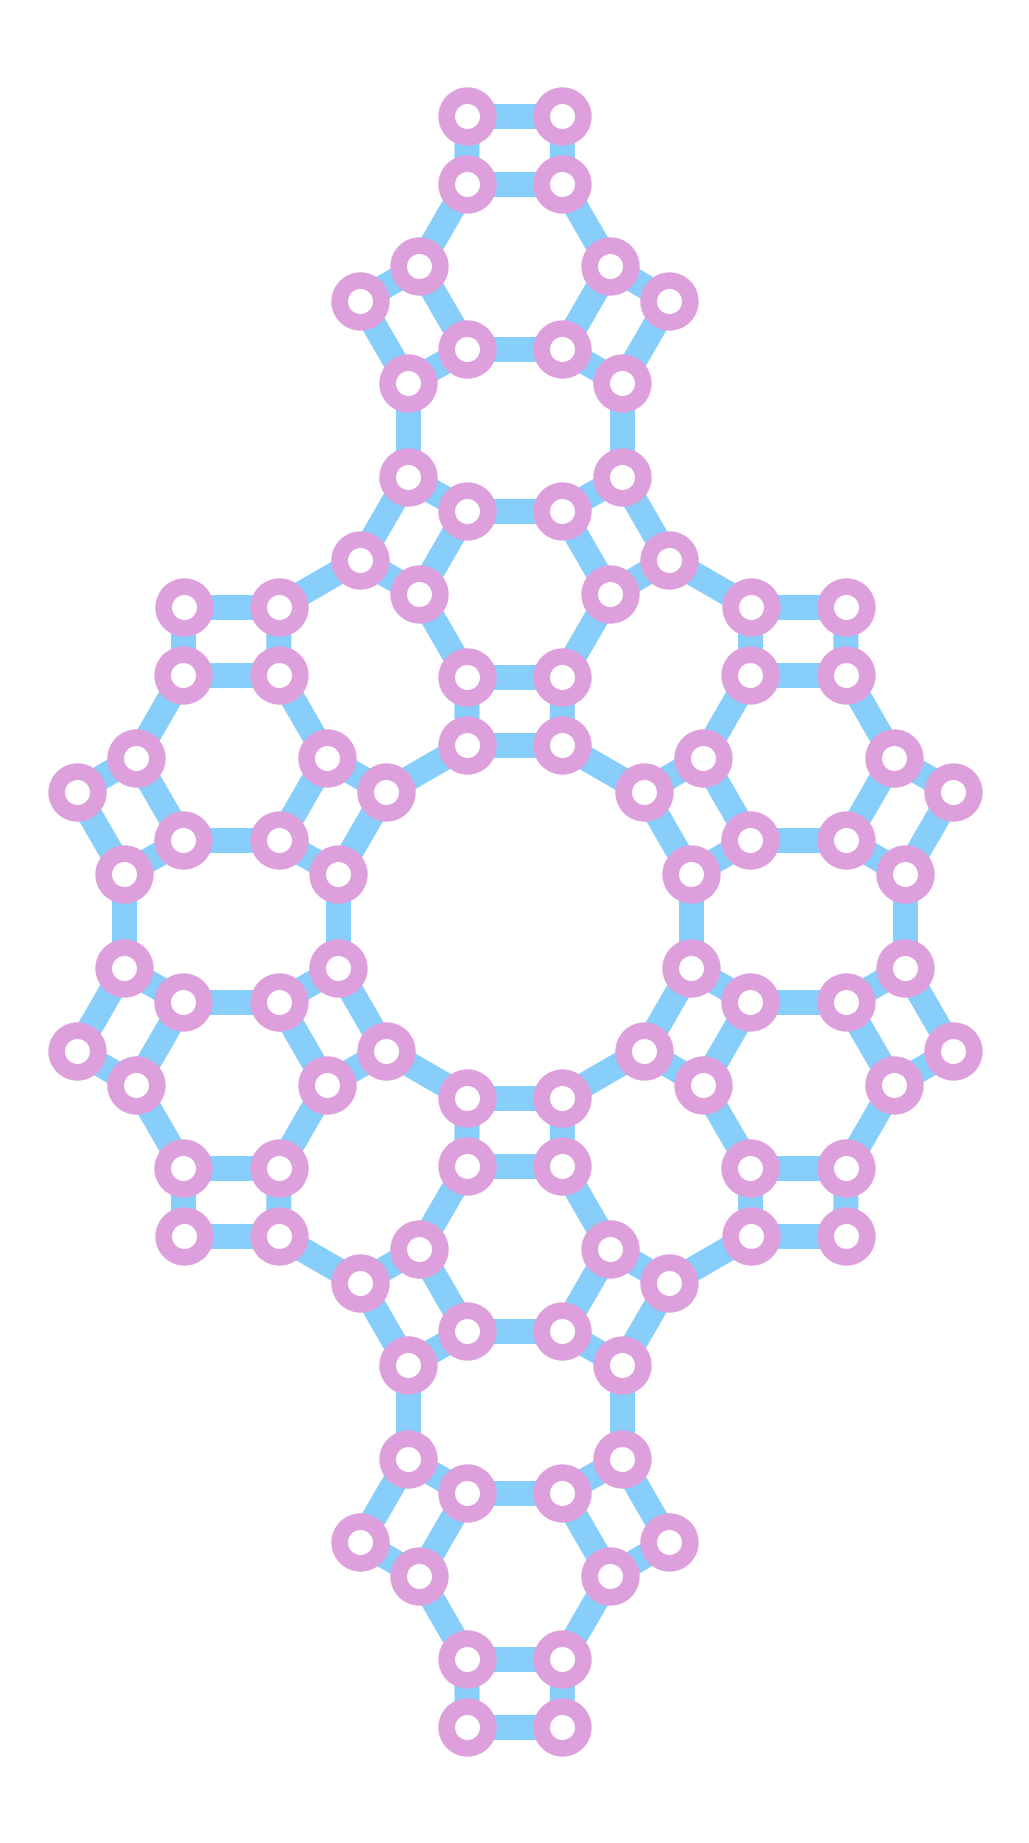

In [6]:
atoms = surf[[atom.index for atom in surf if atom.symbol == 'Si']].positions
fig, ax = plt.subplots(dpi=300, )
fig.set_size_inches(20 / 2.54, 20 / 2.54)
ax.axis('off')
ax.set_aspect('equal')
plot_stick_and_ball(atoms, ax, bt=(0.2, 3.5), 
    stick={'color': 'lightskyblue', 'lw': 6},
    ball={'s': 100, 'lw': 4, 'c': 'w', 'edgecolors': 'plum'})


 ## Save an illustration

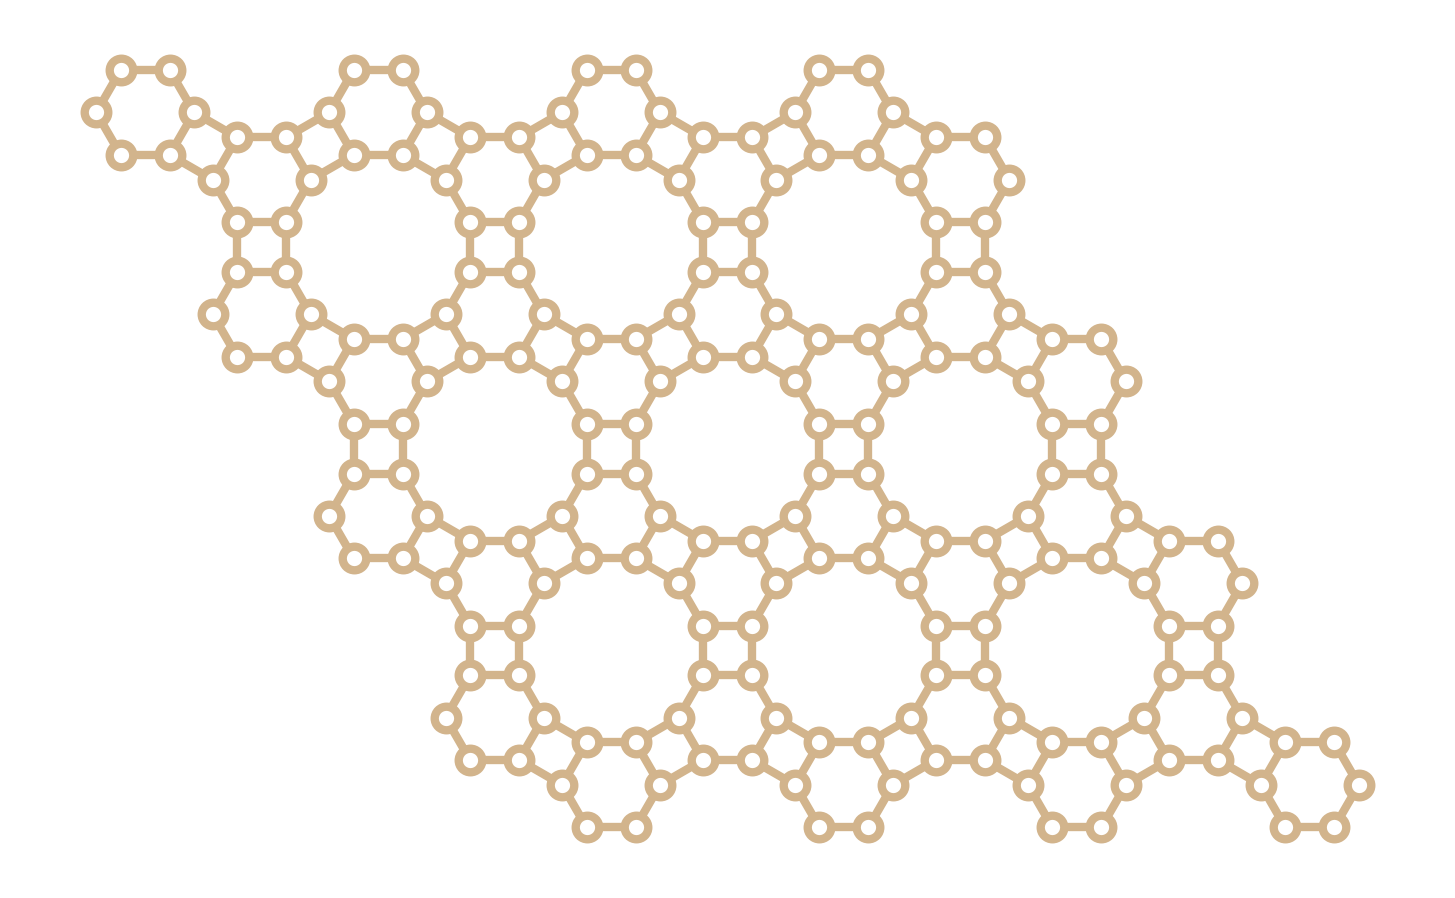

In [7]:
fig, ax = plot_zeolite("iza-structure.org/AFI.cif",
    surface=(0, 0, 1), supercell=(4, 4, 1))
fig.savefig('AFI.svg')
